# Draw beams for paper


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS

- creation date : May 2020




In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools
import matplotlib.gridspec as gridspec

In [151]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size': 14}
plt.rcParams.update(params)

## Constants for conversions

In [152]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [153]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [154]:
deg_to_rad=np.pi/180.

In [155]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [156]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [157]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [158]:
Det_xpic=24.0 # microns per pixel
#Det_NbPix=2048 # number of pixels per CCD side
Det_NbPix=2512 # number of pixels per CCD side For 400 only
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [159]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [160]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [161]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [162]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [163]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [164]:
!ls

Beam4_Rayfile_484_allwl_m00_m00_RAY_HOE_OUT.xlsx
Beam4_Rayfile_484_allwl_m00_m00_RAY_RON200_OUT.xlsx
Beam4_Rayfile_484_allwl_m00_m00_RAY_RON400_OUT.xlsx
DrawBeams.ipynb
gridspec_nested.ipynb


In [165]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}".format(NBTOT,theta_x_str,theta_y_str)

In [166]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_m00_m00'

# Read input files

In [167]:
rayfile_hoe=Beam4_Rayfile+"_RAY_HOE_OUT.xlsx"
rayfile_R400=Beam4_Rayfile+"_RAY_RON400_OUT.xlsx"
rayfile_R200=Beam4_Rayfile+"_RAY_RON200_OUT.xlsx"

In [168]:
input_hoe = pd.ExcelFile(rayfile_hoe)
df_hoe = input_hoe.parse(index_row=0,header=1)
df_hoe=df_hoe.iloc[0:NBTOT]

In [169]:
# rename columns otherwise they are not recognize
df_hoe.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [170]:
df_hoe

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,Xfinal,Yfinal,Zfinal,Notes
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,-1.43476,-1.43476,59,-0.00823,8.12086,115.814,-0.00823,8.12086,115.8135,OK
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,-1.14781,-1.43476,59,-0.00658,8.12081,115.814,-0.00658,8.12081,115.8135,OK
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,-0.86086,-1.43476,59,-0.00494,8.12077,115.814,-0.00494,8.12077,115.8135,OK
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,-0.5739,-1.43476,59,-0.00329,8.12074,115.814,-0.00329,8.12074,115.8135,OK
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,-0.28695,-1.43476,59,-0.00164,8.12071,115.814,-0.00164,8.12071,115.8135,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,0.28695,1.43476,59,-0.00755,21.4428,115.814,-0.00755,21.4428,115.8135,OK
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,0.5739,1.43476,59,-0.01509,21.4428,115.814,-0.01509,21.4428,115.8135,OK
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,0.86086,1.43476,59,-0.02263,21.4429,115.814,-0.02263,21.4429,115.8135,OK
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,1.14781,1.43476,59,-0.03018,21.4429,115.814,-0.03018,21.4429,115.8135,OK


In [171]:
input_R400 = pd.ExcelFile(rayfile_R400)
df_R400 = input_R400.parse(index_row=0,header=1)
df_R400=df_R400.iloc[0:NBTOT]

In [172]:
# rename columns otherwise they are not recognize
df_R400.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [173]:
df_R400

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,Xfinal,Yfinal,Zfinal,Notes
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,-1.43779,-1.45407,57.8,9.44225,0.02828,115.5,9.44225,0.02828,115.5,OK
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,-1.14699,-1.45407,57.8,9.42662,0.02703,115.5,9.42662,0.02703,115.5,OK
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,-0.85619,-1.45407,57.8,9.41176,0.0258,115.5,9.41176,0.0258,115.5,OK
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,-0.56539,-1.45408,57.8,9.39767,0.02456,115.5,9.39767,0.02456,115.5,OK
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,-0.27459,-1.45408,57.8,9.38434,0.02332,115.5,9.38434,0.02332,115.5,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,0.33433,1.45389,57.8,25.149,-0.13227,115.5,25.149,-0.13227,115.5,OK
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,0.62501,1.4539,57.8,25.0651,-0.1285,115.5,25.0651,-0.1285,115.5,OK
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,0.9157,1.4539,57.8,24.9839,-0.12475,115.5,24.9839,-0.12475,115.5,OK
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,1.20638,1.45391,57.8,24.9053,-0.12103,115.5,24.9053,-0.12103,115.5,OK


In [174]:
input_R200 = pd.ExcelFile(rayfile_R200)
df_R200 = input_R200.parse(index_row=0,header=1)
df_R200=df_R200.iloc[0:NBTOT]

In [175]:
# rename columns otherwise they are not recognize
df_R200.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [176]:
df_R200

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,Xfinal,Yfinal,Zfinal,Notes
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,-1.43981,-1.43981,58.7,4.59499,0.00743,115.708,4.59499,0.00743,115.7077,OK
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,-1.15185,-1.43981,58.7,4.59063,0.00684,115.708,4.59063,0.00684,115.7077,OK
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,-0.86389,-1.43981,58.7,4.58662,0.00626,115.708,4.58662,0.00626,115.7077,OK
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,-0.57592,-1.43981,58.7,4.58298,0.00567,115.708,4.58298,0.00567,115.7077,OK
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,-0.28796,-1.43981,58.7,4.57969,0.00507,115.708,4.57969,0.00507,115.7077,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,0.28796,1.43981,58.7,11.6228,-0.02801,115.708,11.6228,-0.02801,115.7077,OK
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,0.57592,1.43981,58.7,11.6061,-0.02648,115.708,11.6061,-0.02648,115.7077,OK
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,0.86389,1.43981,58.7,11.5903,-0.02495,115.708,11.5903,-0.02495,115.7077,OK
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,1.15185,1.43981,58.7,11.5755,-0.02342,115.708,11.5755,-0.02342,115.7077,OK


# Draw beam

In [177]:
ColorDict = {0.0004:"b",0.0006:"g",0.0008:"r",0.001:"k"}

In [178]:
df_R400['Z0']

0      0
1      0
2      0
3      0
4      0
      ..
479    0
480    0
481    0
482    0
483    0
Name: Z0, Length: 484, dtype: object

(-10, 30)

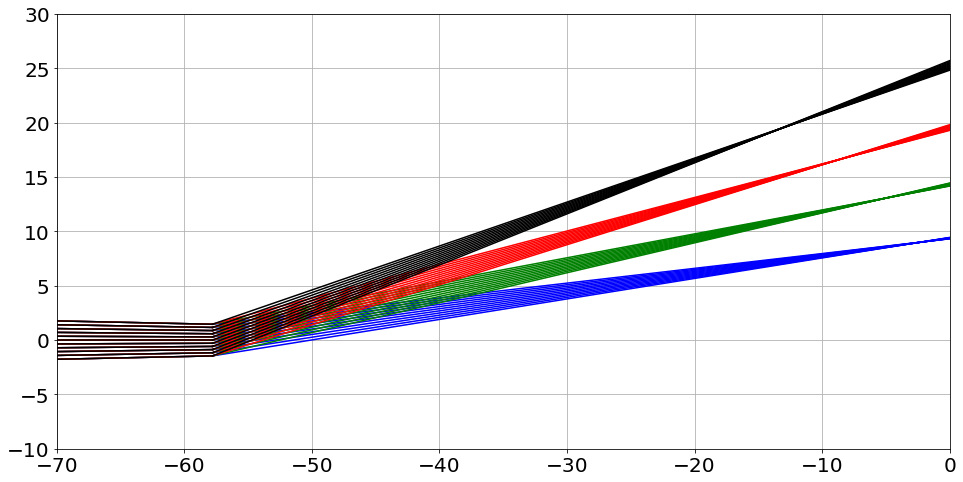

In [179]:
plt.figure(figsize=(16,8))
for index, row in df_R400.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-115.5
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-115.5
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-115.5
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-115.5
    if Y0==0:
        plt.plot([Z0,Z1],[X0,X1],"-",color=col)
        plt.plot([Z1,Z2],[X1,X2],"-",color=col)
        plt.plot([Z2,Z3],[X2,X3],"-",color=col)
plt.grid()
plt.xlim(-70,0)
plt.ylim(-10,30)
    

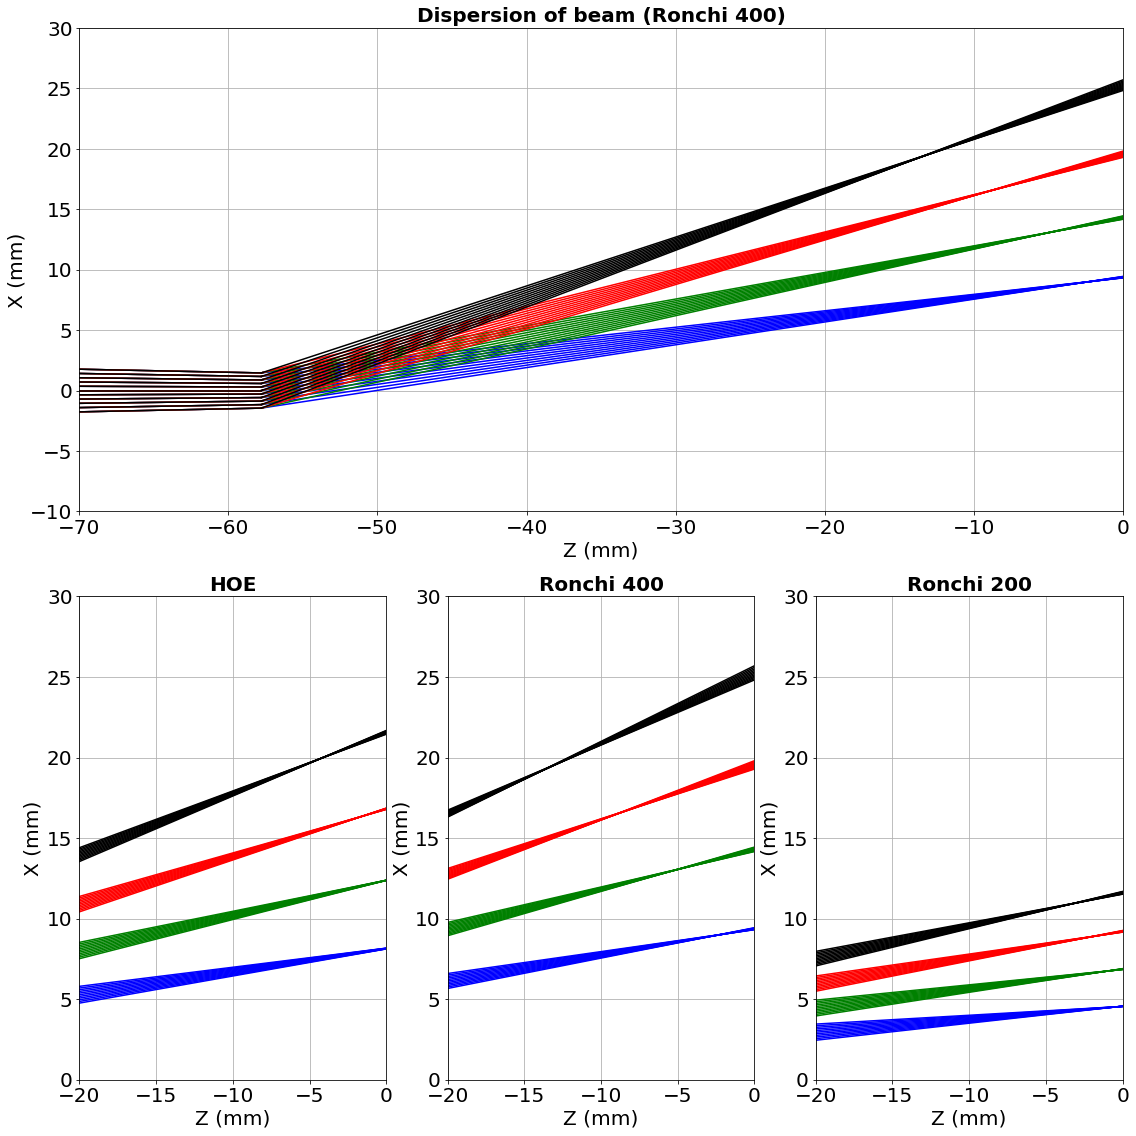

In [180]:
# gridspec inside gridspec
fig = plt.figure(figsize=(16,16))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

ax1 = fig.add_subplot(gs0[0])
for index, row in df_R400.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-115.5
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-115.5
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-115.5
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-115.5
    if Y0==0:
        ax1.plot([Z0,Z1],[X0,X1],"-",color=col)
        ax1.plot([Z1,Z2],[X1,X2],"-",color=col)
        ax1.plot([Z2,Z3],[X2,X3],"-",color=col)
ax1.grid()
ax1.set_xlim(-70,0)
ax1.set_ylim(-10,30)
ax1.set_xlabel("Z (mm)")
ax1.set_ylabel("X (mm)")
ax1.set_title("Dispersion of beam (Ronchi 400)",fontweight="bold",fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax1.tick_params(axis='both', which='minor', labelsize=8)


gs01 = gs0[1].subgridspec(1, 3)
ax2=fig.add_subplot(gs01[0,0])
ax3=fig.add_subplot(gs01[0,1])
ax4=fig.add_subplot(gs01[0,2])


for index, row in df_hoe.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-115.835
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-115.835
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-115.835
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-115.835
    if X0==0:
        ax2.plot([Z2,Z3],[Y2,Y3],"-",color=col)
ax2.grid()
ax2.set_xlim(-20,0)
ax2.set_ylim(0,30)
ax2.set_xlabel("Z (mm)")
ax2.set_ylabel("X (mm)")
ax2.set_title("HOE",fontweight="bold",fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
#ax1.tick_params(axis='both', which='minor', labelsize=8)


for index, row in df_R400.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-115.5
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-115.5
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-115.5
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-115.5
    if Y0==0:
        ax3.plot([Z2,Z3],[X2,X3],"-",color=col)
ax3.grid()
ax3.set_xlim(-20,0)
ax3.set_ylim(0,30)
ax3.set_xlabel("Z (mm)")
ax3.set_ylabel("X (mm)")
ax3.set_title("Ronchi 400",fontweight="bold",fontsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
#ax1.tick_params(axis='both', which='minor', labelsize=8)


for index, row in df_R200.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-115.5
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-115.5
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-115.5
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-115.5
    if Y0==0:
        ax4.plot([Z2,Z3],[X2,X3],"-",color=col)
ax4.grid()
ax4.set_xlim(-20,0)
ax4.set_ylim(0,30)
ax4.set_xlabel("Z (mm)")
ax4.set_ylabel("X (mm)")
ax4.set_title("Ronchi 200",fontweight="bold",fontsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
#ax1.tick_params(axis='both', which='minor', labelsize=8)



plt.tight_layout()
plt.savefig("BeamDispersion.pdf")